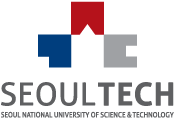

# Lab Session \# 05


---


by Prof. Josué Obregón <br>
Data Analysis for Electronic Manufacturing <br>
Department of Data Science - SeoulTech<br>

## Objective

The objective of this worksheet is to introduce the student to data cleaning and data transformation.

First, some techniques to handle missing data gonna be introduced.

Second, various techniques for transforming numerical variables will be studied. These techniques include Feature Scaling, Feature Transformation, and Feature Discretization.

And third, different coding techniques for categorical variables will ve bpresented. These techniques include only classical encoders.

It is also intended that the student practice the use of these techniques with the libraries available in the Python language.



## Importing libraries and uploading data to various pandas [DataFrames](https://pandas.pydata.org/pandas-docs/version/1.1.5/reference/frame.html)


The libraries we'll import to start with are pandas and numpy for data handling, and matplotlib, seaborn, and plotly for display generation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cleaning data

## Missing data

Let's learn how to use a simple imputer to replace missing values with different strategies

In [2]:
from sklearn.impute import SimpleImputer

In [3]:
imp_mean = SimpleImputer(missing_values=np.nan,
                         strategy='mean')

In [4]:
X1 = [[7, 2, 3], [4, np.nan, 6], [10, 5, 9]]
pd.DataFrame(X1)

,0,1,2
0,7,2.0,3
1,4,NaN,6
2,10,5.0,9


In [14]:
imp_mean.fit(X1)

SimpleImputer()

In [6]:
imp_mean.transform(X1)

array([[ 7. ,  2. ,  3. ],
       [ 4. ,  3.5,  6. ],
       [10. ,  5. ,  9. ]])

In [7]:
pd.DataFrame(imp_mean.transform(X1))

,0,1,2
0,7.0,2.0,3.0
1,4.0,3.5,6.0
2,10.0,5.0,9.0


In [8]:
X2 = [[np.nan, 2, 3], [4, np.nan, 6], [10, np.nan, 9]]
pd.DataFrame(X2)

,0,1,2
0,NaN,2.0,3
1,4.0,NaN,6
2,10.0,NaN,9


In [9]:
imp_mean.transform(X2) # X!과 같은 파라미터를 쓰기 때문에 값이 똑같음

array([[ 7. ,  2. ,  3. ],
       [ 4. ,  3.5,  6. ],
       [10. ,  3.5,  9. ]])

In [10]:
pd.DataFrame(imp_mean.transform(X2))

,0,1,2
0,7.0,2.0,3.0
1,4.0,3.5,6.0
2,10.0,3.5,9.0


In [11]:
imp_mean.statistics_

array([7. , 3.5, 6. ])

In [12]:
imp_mean = SimpleImputer(missing_values=np.nan,
                         strategy='mean')

In [15]:
 imp_mean.statistics_ # imp_mean.fit(X1)를 다시 실행해야 값이 나옴

array([7. , 3.5, 6. ])

You can also check the [KNN imputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html#sklearn.impute.KNNImputer). Can you guess how this work?

Another way is to add an indicator variable to denote that there are missing values

In [16]:
from sklearn.impute import MissingIndicator

In [17]:
indicator = MissingIndicator()

In [18]:
indicator.fit(X1)

MissingIndicator()

In [19]:
pd.DataFrame(X1)

,0,1,2
0,7,2.0,3
1,4,NaN,6
2,10,5.0,9


In [20]:
indicator.transform(X1)

array([[False],
       [ True],
       [False]])

In [21]:
indicator.fit(X2)

MissingIndicator()

In [22]:
pd.DataFrame(X2)

,0,1,2
0,NaN,2.0,3
1,4.0,NaN,6
2,10.0,NaN,9


In [23]:
indicator.transform(X2)

array([[ True, False],
       [False,  True],
       [False,  True]])

In [24]:
indicator = MissingIndicator(error_on_new=False)

In [25]:
indicator.fit(X1)

MissingIndicator(error_on_new=False)

In [26]:
pd.DataFrame(X1)

,0,1,2
0,7,2.0,3
1,4,NaN,6
2,10,5.0,9


In [27]:
indicator.transform(X1)

array([[False],
       [ True],
       [False]])

In [28]:
indicator.fit(X2)

MissingIndicator(error_on_new=False)

In [29]:
pd.DataFrame(X2)

,0,1,2
0,NaN,2.0,3
1,4.0,NaN,6
2,10.0,NaN,9


In [30]:
indicator.transform(X2)

array([[ True, False],
       [False,  True],
       [False,  True]])

# Loading data and checking outliers

In [31]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [32]:
data = fetch_california_housing()
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [33]:
#X, y = data.data, data.target

df = pd.DataFrame(data.data, columns=data.feature_names)

X_train, X_test, y_train, y_test = train_test_split(df,data.target,shuffle=True,test_size=0.25,random_state=712)

print(X_train.shape)
print(X_test.shape)

(15480, 8)
(5160, 8)


In [34]:
X_train = X_train.copy()

## Overview of the dataset and removing outliers

In [35]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15480 entries, 10391 to 16429
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      15480 non-null  float64
 1   HouseAge    15480 non-null  float64
 2   AveRooms    15480 non-null  float64
 3   AveBedrms   15480 non-null  float64
 4   Population  15480 non-null  float64
 5   AveOccup    15480 non-null  float64
 6   Latitude    15480 non-null  float64
 7   Longitude   15480 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [36]:
X_train.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [ ]:
X_train.describe()

<Axes: ylabel='Density'>

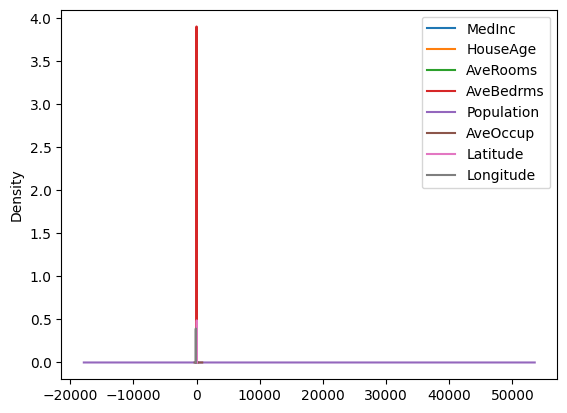

In [38]:
X_train.plot.kde()

array([<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>], dtype=object)

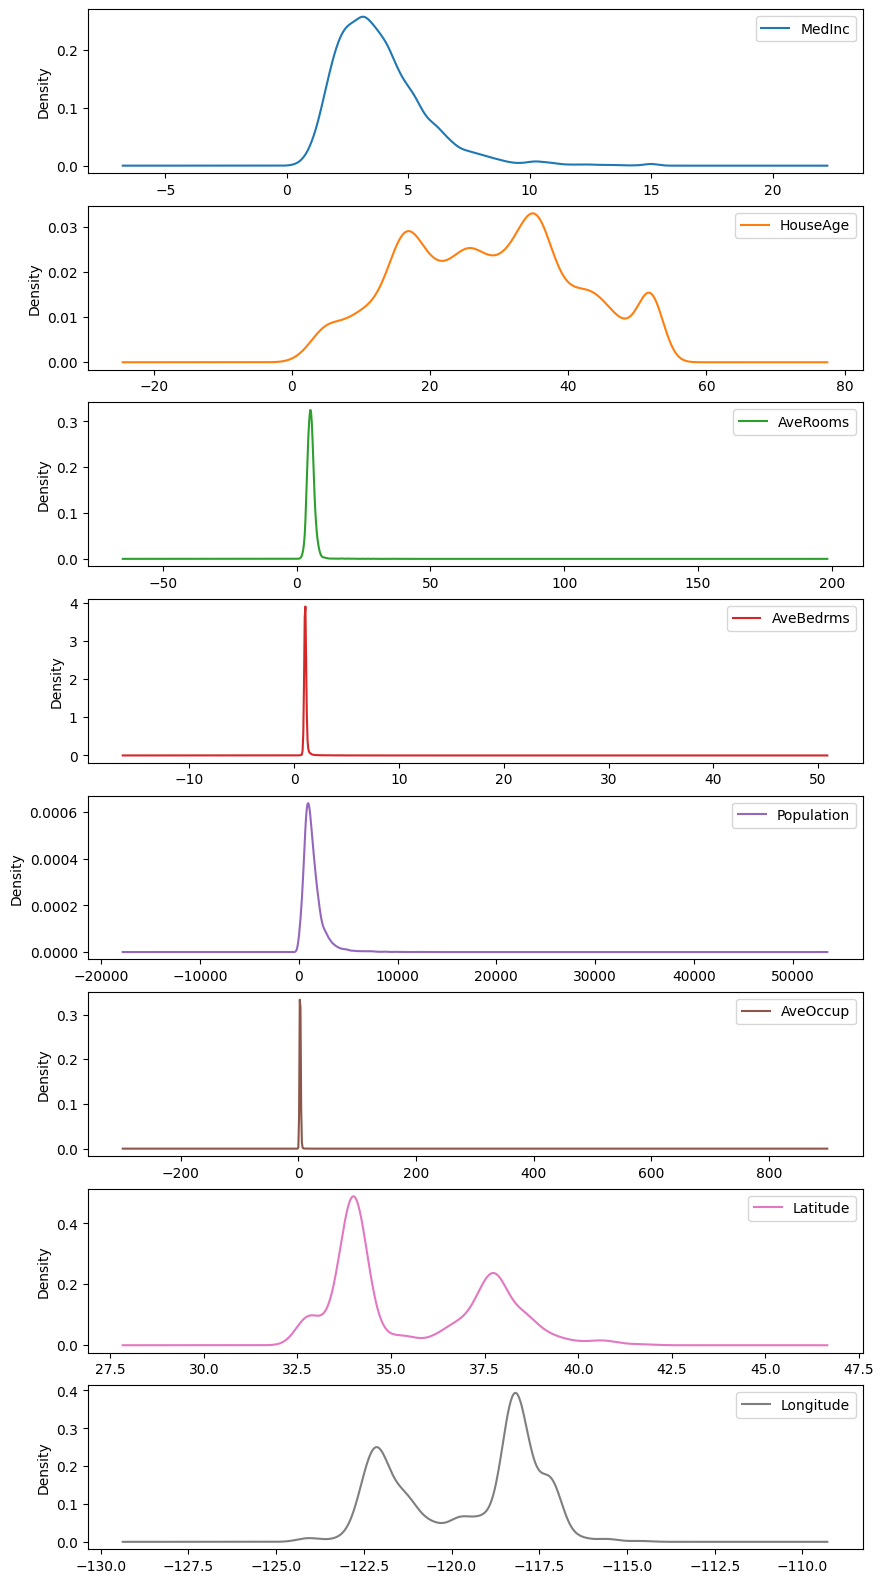

In [39]:
X_train.plot.kde(subplots=True, figsize=(10,20), sharex=False)

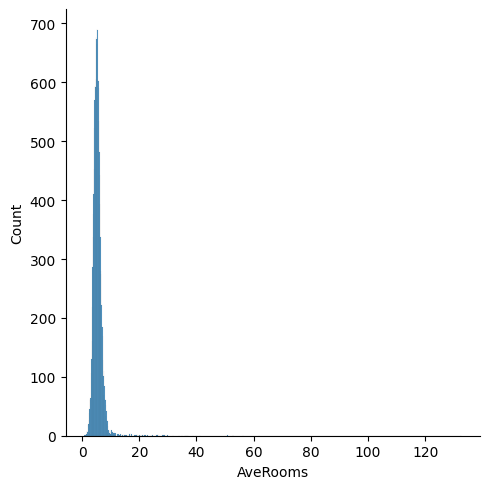

In [40]:
sns.displot(data=X_train, x='AveRooms')

In [41]:
X_train['AveRooms'].quantile()

5.234243228890069

In [42]:
X_train['AveRooms'].quantile([0.1, 0.5, 0.9, 0.95, 0.99])

0.10     3.789901
0.50     5.234243
0.90     6.949711
0.95     7.621966
0.99    10.389467
Name: AveRooms, dtype: float64

In [43]:
X_train_99 = X_train[X_train['AveRooms'] < X_train['AveRooms'].quantile(0.99)].copy()
X_train_99.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,15325.000000,15325.000000,15325.000000,15325.000000,15325.000000,15325.000000,15325.00000,15325.000000
mean,3.858829,28.698532,5.280798,1.066798,1433.951843,3.012213,35.61549,-119.568251
std,1.872197,12.569164,1.236694,0.131820,1137.113957,5.311717,2.12748,2.001296
min,0.499900,1.000000,0.846154,0.444444,3.000000,0.750000,32.54000,-124.350000
25%,2.558300,18.000000,4.434322,1.005017,794.000000,2.436923,33.93000,-121.790000
50%,3.541700,29.000000,5.219766,1.047109,1173.000000,2.830357,34.25000,-118.490000
75%,4.738100,37.000000,6.018868,1.097297,1740.000000,3.291322,37.71000,-118.010000
max,15.000100,52.000000,10.386667,3.187970,35682.000000,599.714286,41.95000,-114.550000


In [44]:
X_train_99_2 = X_train.copy()
X_train_99_2.loc[X_train['AveRooms'] > X_train['AveRooms'].quantile(0.99),'AveRooms'] = X_train['AveRooms'].quantile(0.99)
X_train_99_2.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,15480.000000,15480.000000,15480.000000,15480.000000,15480.000000,15480.000000,15480.000000,15480.000000
mean,3.861731,28.588372,5.331950,1.095334,1425.278359,3.008388,35.627668,-119.562800
std,1.880197,12.588856,1.331472,0.447110,1136.006138,5.286262,2.134114,2.001199
min,0.499900,1.000000,0.846154,0.444444,3.000000,0.750000,32.540000,-124.350000
25%,2.559800,18.000000,4.442168,1.005592,786.000000,2.433883,33.930000,-121.770000
50%,3.543550,29.000000,5.234243,1.048023,1167.500000,2.824752,34.260000,-118.500000
75%,4.736900,37.000000,6.052381,1.099490,1732.000000,3.286539,37.710000,-118.000000
max,15.000100,52.000000,10.389467,34.066667,35682.000000,599.714286,41.950000,-114.310000


In [45]:
X_train_99_2[X_train['AveRooms']> X_train['AveRooms'].quantile(0.99)].describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,155.000000,155.000000,1.550000e+02,155.000000,155.000000,155.000000,155.000000,155.000000
mean,4.148654,17.696774,1.038947e+01,3.916706,567.722581,2.630249,36.831742,-119.023935
std,2.541920,9.391468,1.782115e-15,3.204886,548.314235,1.066554,2.433779,1.922742
min,0.499900,1.000000,1.038947e+01,1.136201,9.000000,1.368421,32.680000,-123.490000
25%,2.741600,12.000000,1.038947e+01,2.248820,202.000000,2.214592,34.240000,-120.265000
50%,3.604200,16.000000,1.038947e+01,2.963542,382.000000,2.500000,37.640000,-119.570000
75%,4.625000,22.500000,1.038947e+01,4.689042,724.000000,2.754720,39.065000,-117.170000
max,15.000100,52.000000,1.038947e+01,34.066667,2880.000000,14.000000,41.500000,-114.310000


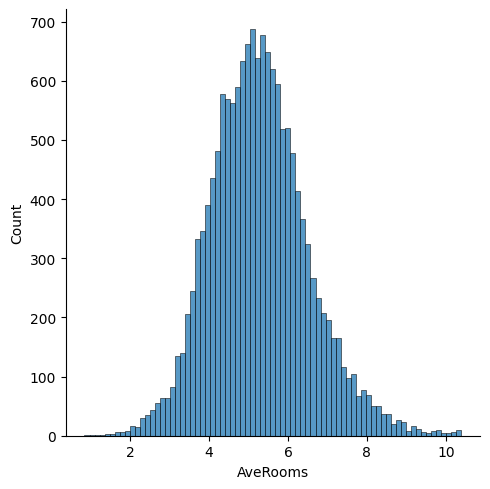

In [46]:
sns.displot(data=X_train_99, x='AveRooms')

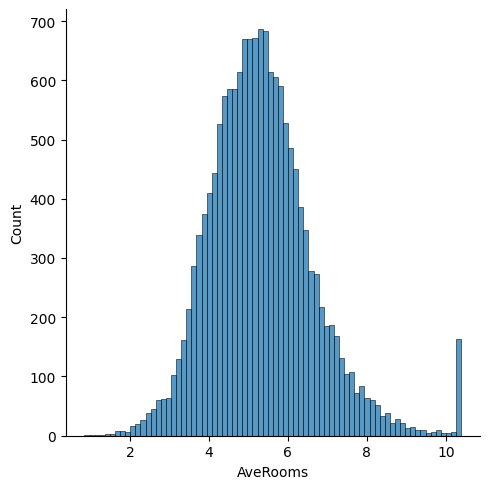

In [47]:
sns.displot(data=X_train_99_2, x='AveRooms')

# Engineering numeric predictors

## Feature Scaling
---

**Some commonly used models**
  
|Algorithm name | Do you need scaling? |
|--|--|
| SVM, KNN, PCA, K-Means, Linear Regression, Logistic Regression, Linear Discriminant Analysis| $\checkmark$ |
| Naïve Bayes, Tree-Based models | $\times$ |


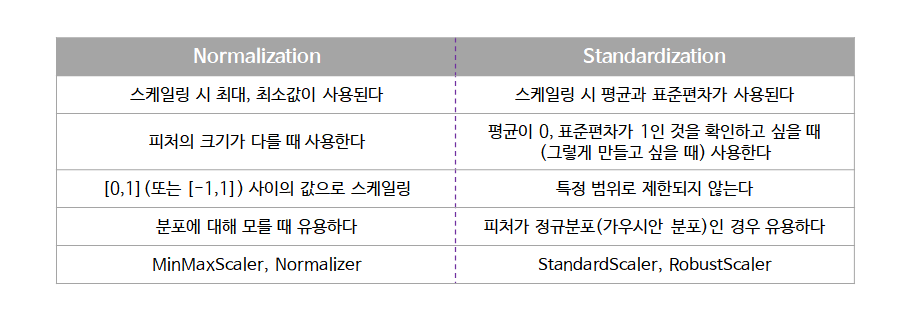

### Min-Max scaling <- 정규화의 일종

Suppose we want to rescale the attribute in the range $(a,b)$

Formula: ${x}' = a + \frac{x - \mathrm{min}(x)\times (b - a) }{\mathrm{max}(x) -\mathrm{min}(x)} $

This method is very sensitive to outliers because they affect both min$(x)$ and max$(x)$

회귀 모형에 적합

In [48]:
from sklearn.preprocessing import MinMaxScaler

In [49]:
mm_scaler = MinMaxScaler()

In [52]:
col_name = 'AveRooms'
trans_col_name = 'AveRooms_mm'
X_train[trans_col_name] = mm_scaler.fit_transform(X_train[[col_name]])
X_train_99[trans_col_name] = mm_scaler.fit_transform(X_train_99[[col_name]])

<Axes: xlabel='AveRooms_mm', ylabel='Count'>

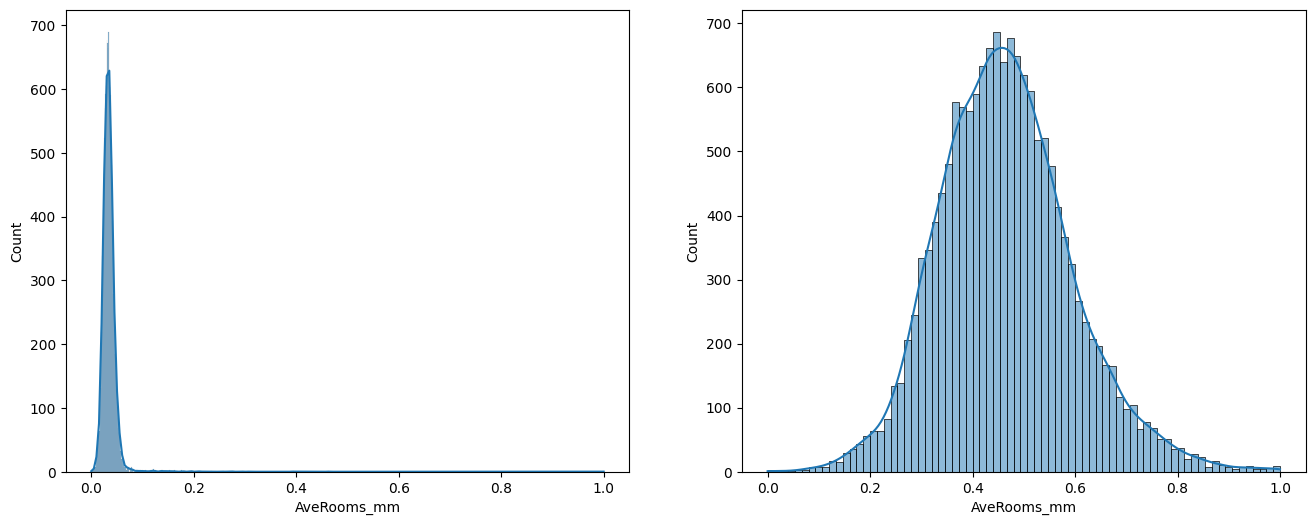

In [53]:
fig, axes = plt.subplots(ncols=2, figsize=(16,6))
sns.histplot(data=X_train, x=trans_col_name, ax=axes[0], kde=True)
# axes[0].set_title('Histogram with whole training data')
sns.histplot(data=X_train_99, x=trans_col_name, ax=axes[1],kde=True)
# axes[1].set_title('Histogram of training data with no outliers (99 percentile)')

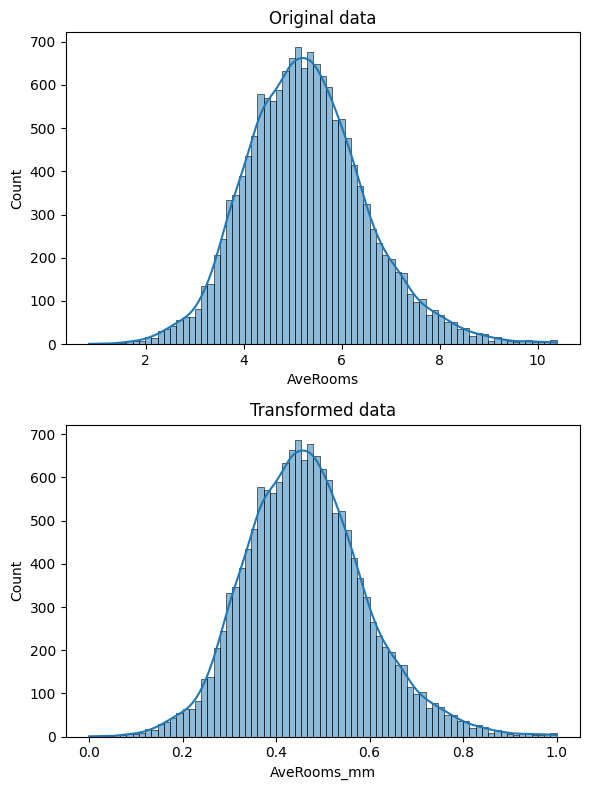

In [54]:
fig, axes = plt.subplots(nrows=2, figsize=(6,8))
sns.histplot(data=X_train_99, x=col_name, ax=axes[0],kde=True)
axes[0].set_title('Original data')
sns.histplot(data=X_train_99, x=trans_col_name, ax=axes[1],kde=True)
axes[1].set_title('Transformed data')
plt.tight_layout() # shape는 같지만 scale이 다름

In [ ]:
mm_scaler.inverse_transform

### Standardization or Normalization

Formula: ${z} = \frac{x - \mu }{\sigma}$

Where $\mu$ is the mean of $X$ and $\sigma$ is the standard deviation.

This method is also sensitive to outliers because they affect both $\mu$ and $\sigma$

In [55]:
from sklearn.preprocessing import StandardScaler

In [57]:
sd_scaler = StandardScaler()
sd_scaler2 = StandardScaler(with_mean=True, with_std=False)

In [58]:
col_name = 'AveRooms'
trans_col_name = 'AveRooms_sd'
X_train[trans_col_name]= sd_scaler.fit_transform(X_train[[col_name]])
X_train_99[trans_col_name]= sd_scaler.fit_transform(X_train_99[[col_name]])
X_train_99[f'{trans_col_name}_2']= sd_scaler2.fit_transform(X_train_99[[col_name]])

<Axes: xlabel='AveRooms_sd_2', ylabel='Count'>

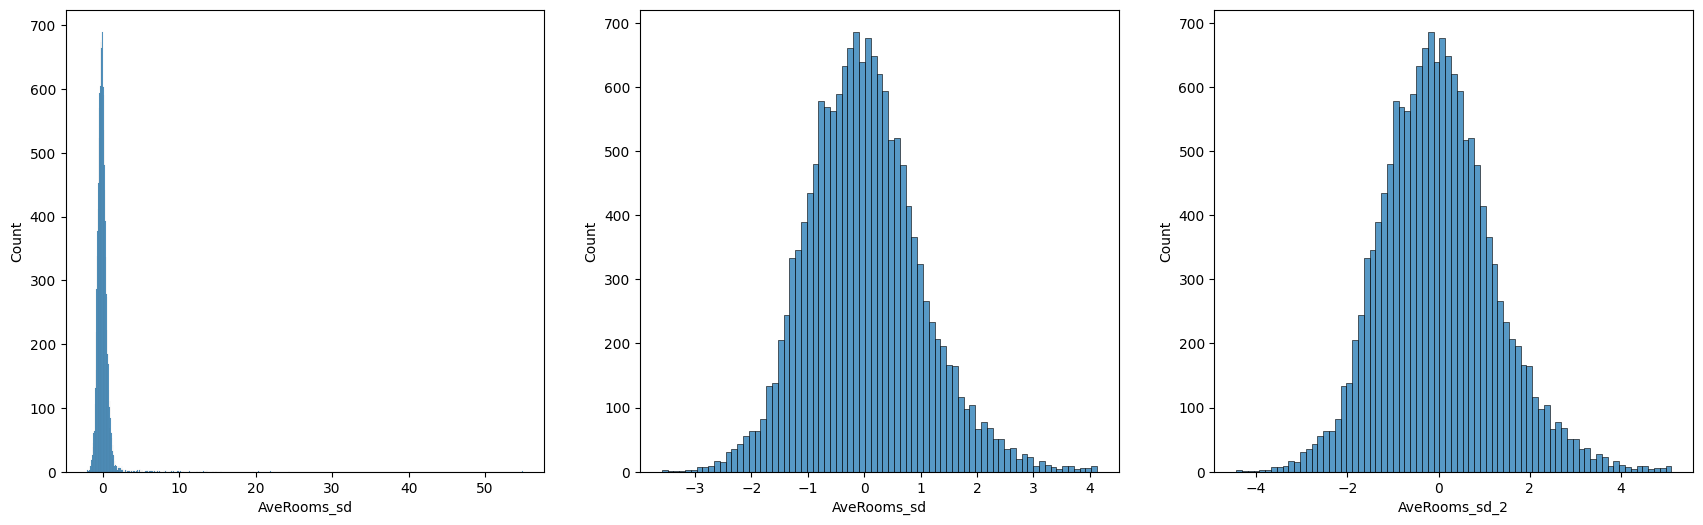

In [59]:
fig, axes = plt.subplots(ncols=3, figsize=(21,6))
sns.histplot(data=X_train, x=trans_col_name, ax=axes[0])
# axes[0].set_title('Histogram with whole training data')
sns.histplot(data=X_train_99, x=trans_col_name, ax=axes[1])
sns.histplot(data=X_train_99, x=f'{trans_col_name}_2', ax=axes[2])
# axes[1].set_title('Histogram of training data with no outliers (99 percentile)')

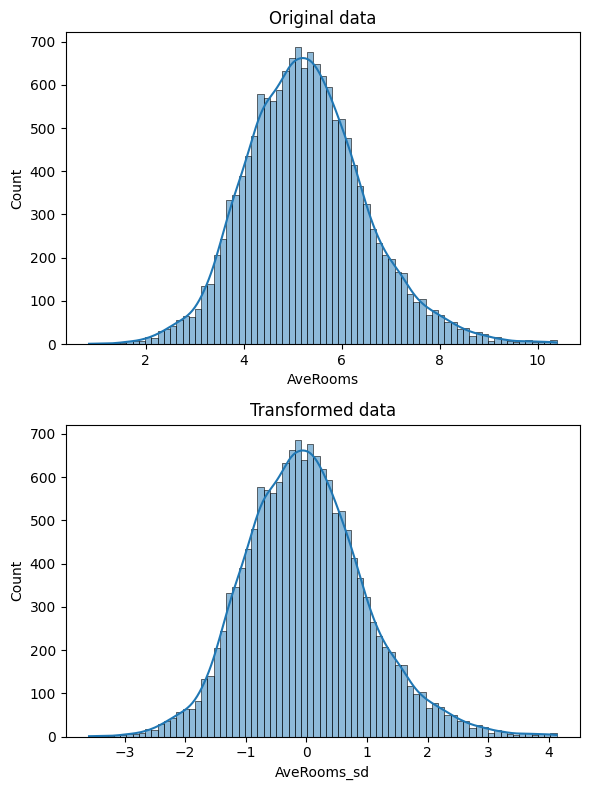

In [60]:
fig, axes = plt.subplots(nrows=2, figsize=(6,8))
sns.histplot(data=X_train_99, x=col_name, ax=axes[0],kde=True)
axes[0].set_title('Original data')
sns.histplot(data=X_train_99, x=trans_col_name, ax=axes[1], kde=True)
axes[1].set_title('Transformed data')
plt.tight_layout()

### Robust Scaling <- 표준화의 일종

Suppose we want to scale the attribute in the range of quantiles $(a, b)$

Formula: ${x}' = \frac{x - \mathrm{median}(x)}{\mathrm{quantile}(x,b) - \mathrm{quantile}(x,a)}$

This method is more robust to outliers.

분류 모형에 적합

In [61]:
from sklearn.preprocessing import RobustScaler

In [62]:
rb_scaler = RobustScaler()

In [63]:
col_name = 'AveRooms'
trans_col_name = 'AveRooms_rb'
X_train[trans_col_name]= rb_scaler.fit_transform(X_train[[col_name]])
X_train_99[trans_col_name]= rb_scaler.fit_transform(X_train_99[[col_name]])

<Axes: xlabel='AveRooms_rb', ylabel='Count'>

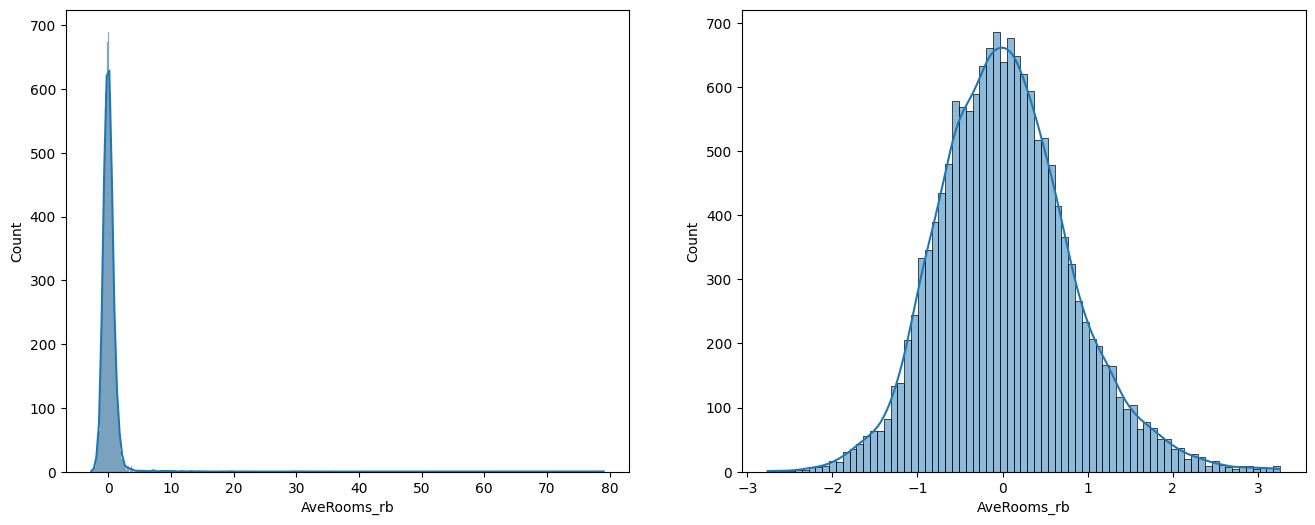

In [64]:
fig, axes = plt.subplots(ncols=2, figsize=(16,6))
sns.histplot(data=X_train, x=trans_col_name, ax=axes[0], kde=True)
# axes[0].set_title('Histogram with whole training data')
sns.histplot(data=X_train_99, x=trans_col_name, ax=axes[1],kde=True)
# axes[1].set_title('Histogram of training data with no outliers (99 percentile)')

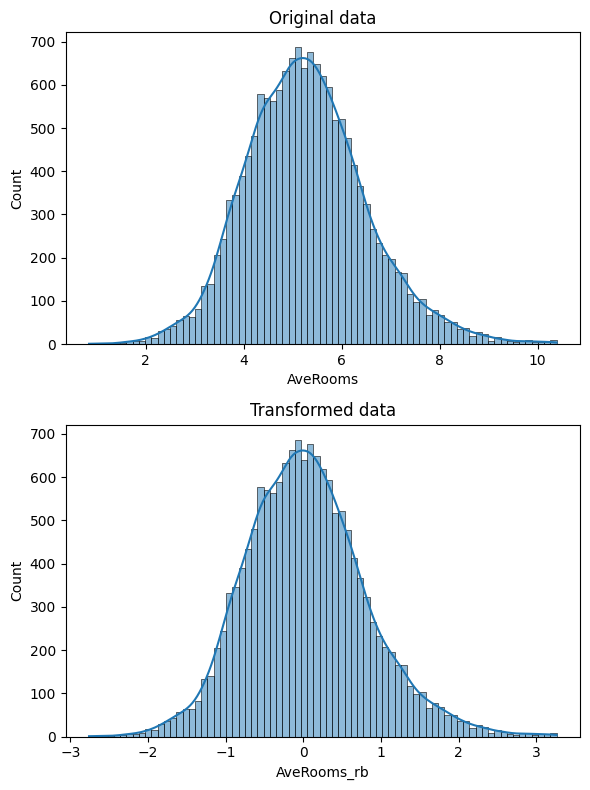

In [65]:
fig, axes = plt.subplots(nrows=2, figsize=(6,8))
sns.histplot(data=X_train_99, x=col_name, ax=axes[0],kde=True)
axes[0].set_title('Original data')
sns.histplot(data=X_train_99, x=trans_col_name, ax=axes[1],kde=True)
axes[1].set_title('Transformed data')
plt.tight_layout()

## Feature Transformation
---

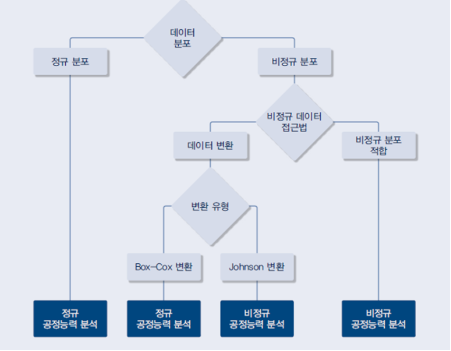

### Box-Cox transformation

The Box-Cox transformation works only for strictly positive numbers. The transformation is defined as follows:

$x_i'(\lambda) = \left\{\begin{matrix}
  \frac{x_i^\lambda - 1}{\lambda}& if \lambda \neq 0\\
  log(\lambda)& if \lambda = 0
\end{matrix}\right.$

### Yeo-Johnson Transformation

The Yeo-Johnson transformation works for both positive and negative values. The transformation is defined as follows:

$x_i(\lambda) = \left\{\begin{matrix}
\frac{[(x_i + 1)^{\lambda} -1]}{\lambda} & if \, \, \lambda\neq 0, x_i \geq 0 \\
ln(x_i + 1) & if \, \, \lambda = 0, x_i \geq 0\\
-\frac{[(-x_i + 1)^{2- \lambda} -1]}{2-\lambda} & if \, \, \lambda\neq 2, x_i < 0 \\
-ln(-x_i + 1) & if \, \, \lambda = 2, x_i < 0\\
\end{matrix}\right.$


Usually the values of $\lambda$ between $[-5.5]$ are considered and the optimal value that stabilizes the variance and minimizes the asymmetry is selected using MLE (Maximum Likelihood Estimate)

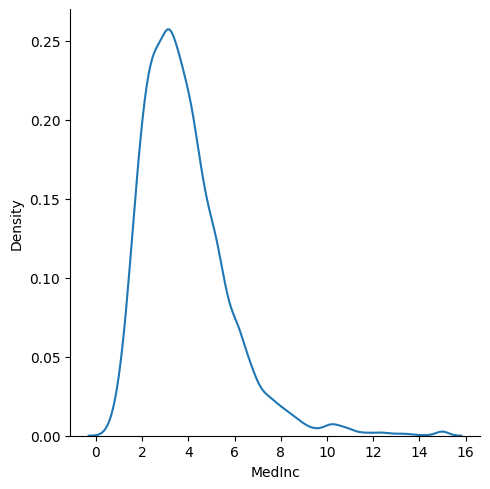

In [67]:
sns.displot(data=X_train_99, x='MedInc', kind='kde')

In [68]:
from sklearn.preprocessing import PowerTransformer

In [69]:
bx_transformer = PowerTransformer()

In [70]:
col_name = 'MedInc'
trans_col_name = 'MedInc_bx'
X_train[trans_col_name]= bx_transformer.fit_transform(X_train[[col_name]])
X_train_99[trans_col_name]= bx_transformer.fit_transform(X_train_99[[col_name]])

<Axes: xlabel='MedInc_bx', ylabel='Count'>

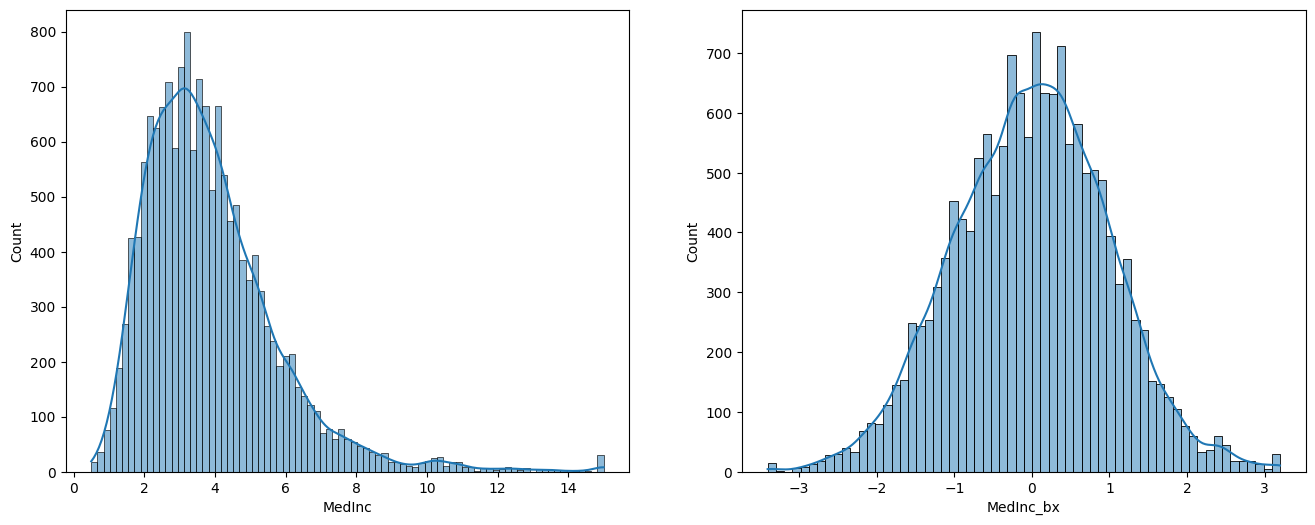

In [71]:
fig, axes = plt.subplots(ncols=2, figsize=(16,6))
sns.histplot(data=X_train, x=col_name, ax=axes[0], kde=True)
# axes[0].set_title('Histogram with whole training data')
sns.histplot(data=X_train_99, x=trans_col_name, ax=axes[1],kde=True)
# axes[1].set_title('Histogram of training data with no outliers (99 percentile)')

In [72]:
bx_transformer.lambdas_ #ppt 28페이지 0에서 -0,5 사이 값이므로 Reciprocal square root transform

array([-0.17491551])

In [73]:
from scipy.stats import probplot

In [74]:
probplot?

((array([-3.91728489, -3.69792144, -3.57774746, ...,  3.57774746,
          3.69792144,  3.91728489]),
  array([-3.40815622, -3.40815622, -3.40815622, ...,  3.18853953,
          3.18853953,  3.18853953])),
 (0.9998724780966165, -7.637575711283022e-16, 0.9996315318392552))

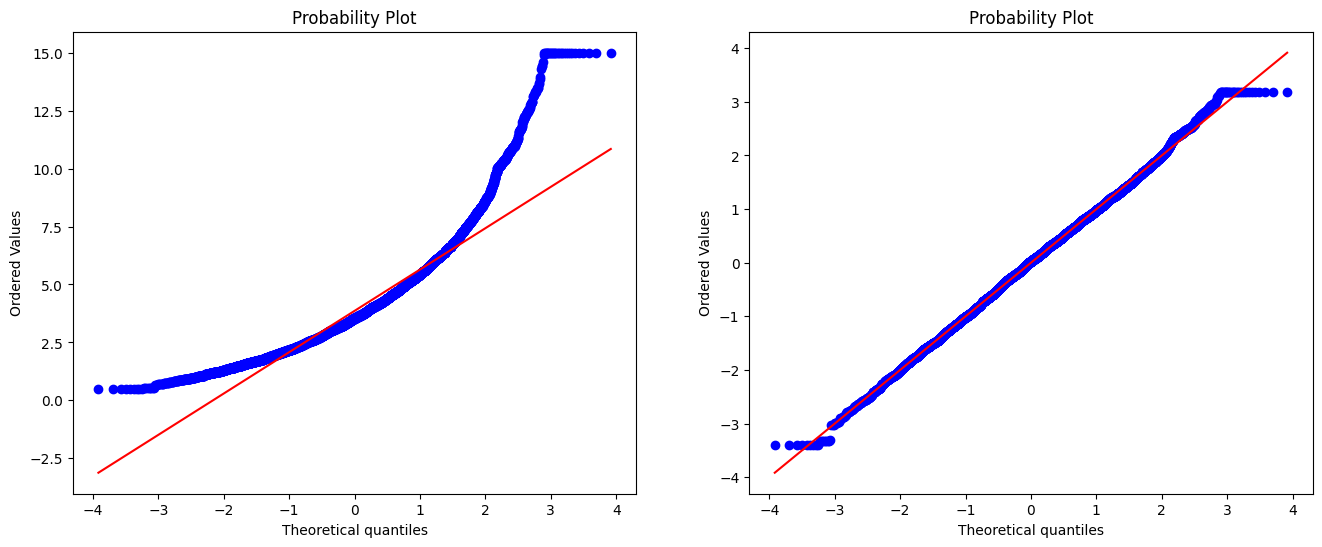

In [75]:
fig, axes = plt.subplots(ncols=2, figsize=(16,6))
probplot(X_train[col_name], plot=axes[0])
probplot(X_train[trans_col_name], plot=axes[1])


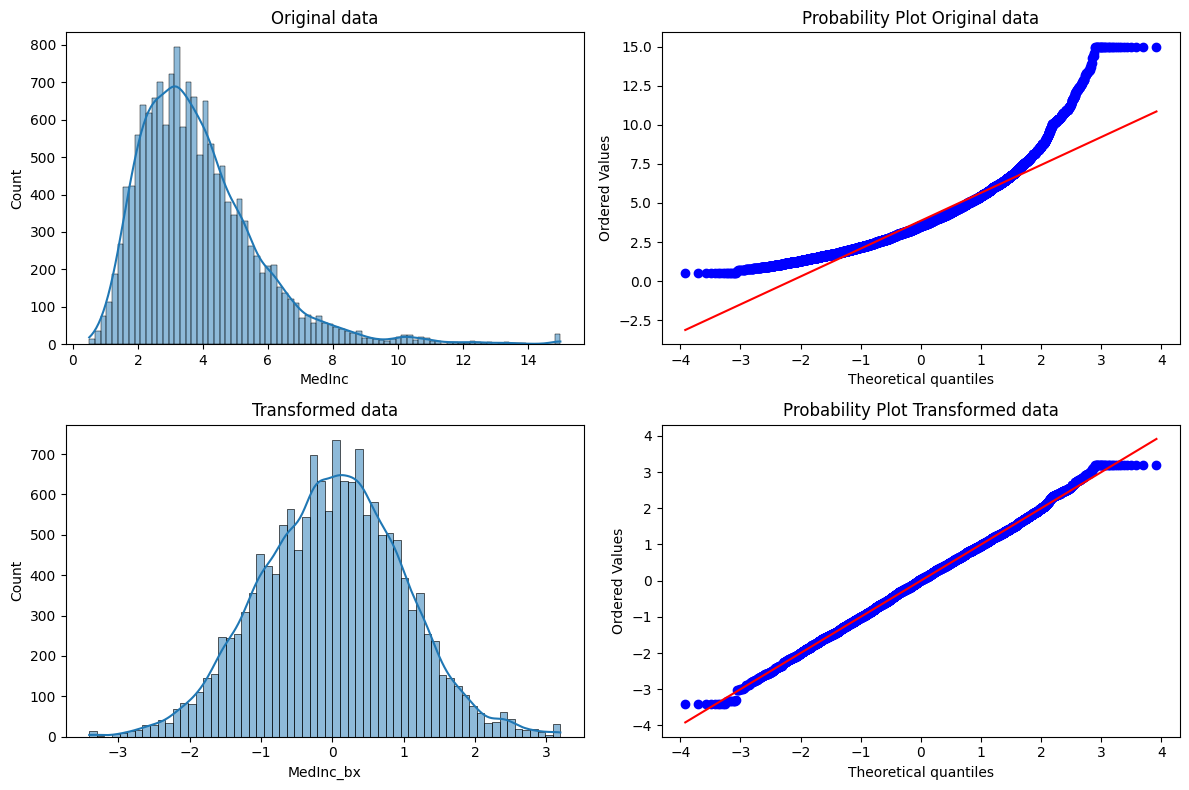

In [76]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
sns.histplot(data=X_train_99, x=col_name, ax=axes[0,0],kde=True)
probplot(X_train[col_name], plot=axes[0,1])
axes[0,0].set_title('Original data')
axes[0,1].set_title(axes[0,1].get_title()+' Original data')
sns.histplot(data=X_train_99, x=trans_col_name, ax=axes[1,0], kde=True)
probplot(X_train[trans_col_name], plot=axes[1,1])
axes[1,0].set_title('Transformed data')
axes[1,1].set_title(axes[1,1].get_title()+' Transformed data')
plt.tight_layout()

In [77]:
from sklearn.preprocessing import FunctionTransformer

np.log

np.reciprocal 역수

np.sqrt

np.cbrt 세제곱근

In [78]:
my_transformer = FunctionTransformer(np.log)

In [85]:
col_name

'MedInc'

<Axes: ylabel='Density'>

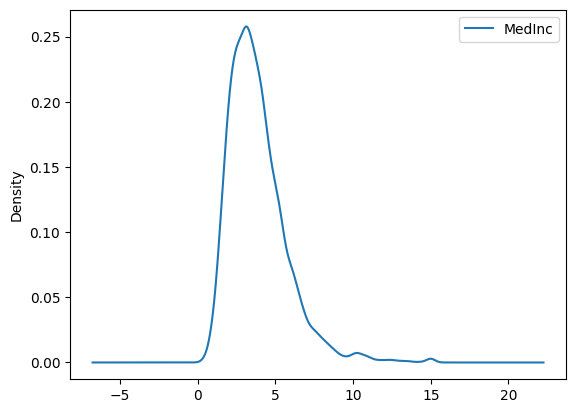

In [79]:
X_train[[col_name]].plot.kde()

<Axes: ylabel='Density'>

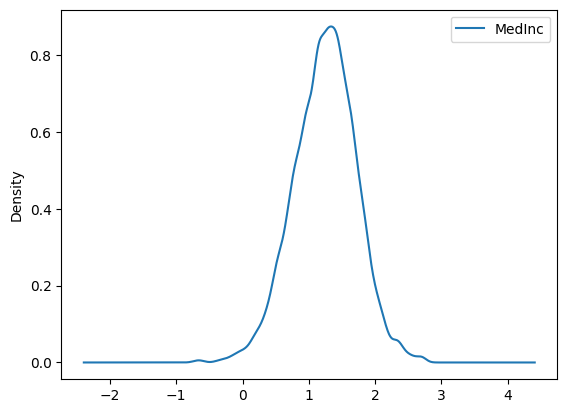

In [80]:
FunctionTransformer(np.log).transform(X_train[[col_name]]).plot.kde()

<Axes: ylabel='Density'>

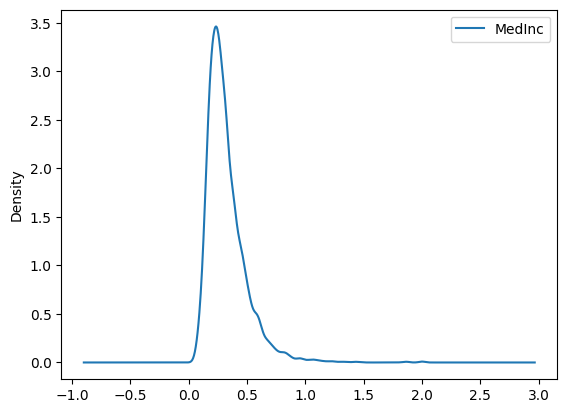

In [81]:
FunctionTransformer(np.reciprocal).transform(X_train[[col_name]]).plot.kde()

<Axes: ylabel='Density'>

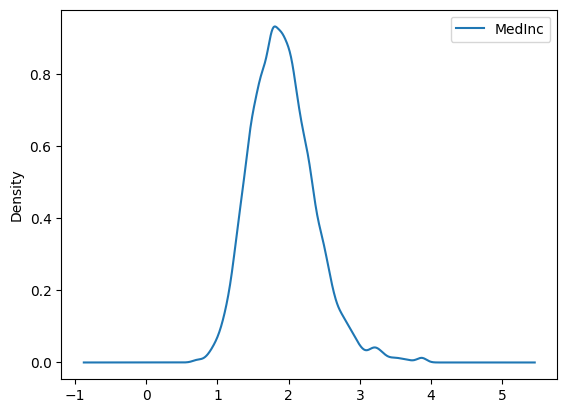

In [82]:
FunctionTransformer(np.sqrt).transform(X_train[[col_name]]).plot.kde()

<Axes: ylabel='Density'>

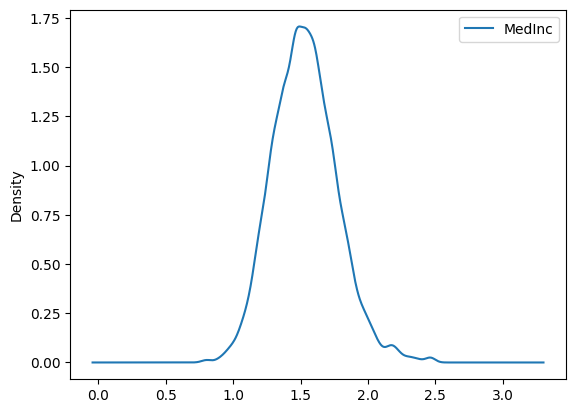

In [83]:
FunctionTransformer(np.cbrt).transform(X_train[[col_name]]).plot.kde()

Lest try with another attribute

<Axes: xlabel='HouseAge', ylabel='Density'>

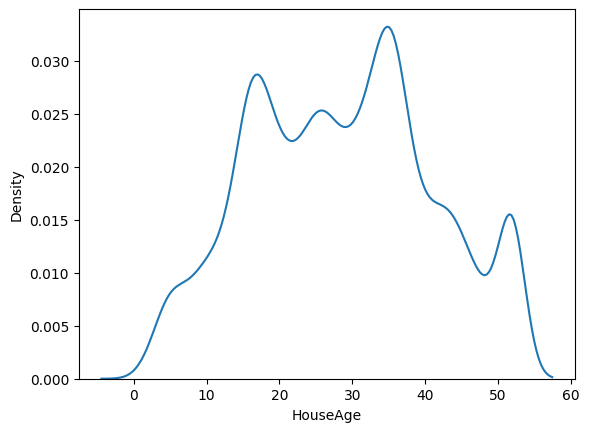

In [86]:
sns.kdeplot(data=X_train_99, x='HouseAge')

In [87]:
col_name = 'HouseAge'
trans_col_name = 'HouseAge_bx'
X_train[trans_col_name]= bx_transformer.fit_transform(X_train[[col_name]])
X_train_99[trans_col_name]= bx_transformer.fit_transform(X_train_99[[col_name]])

<Axes: xlabel='HouseAge_bx', ylabel='Count'>

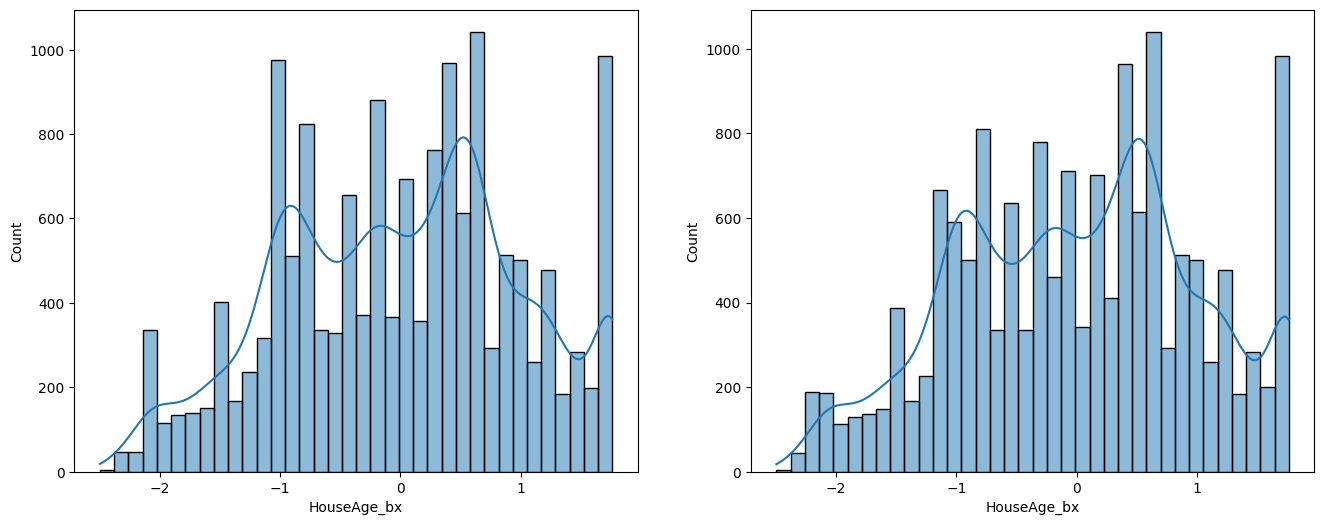

In [88]:
fig, axes = plt.subplots(ncols=2, figsize=(16,6))
sns.histplot(data=X_train, x=trans_col_name, ax=axes[0], kde=True)
# axes[0].set_title('Histogram with whole training data')
sns.histplot(data=X_train_99, x=trans_col_name, ax=axes[1],kde=True)
# axes[1].set_title('Histogram of training data with no outliers (99 percentile)')

In [91]:
bx_transformer.lambdas_

array([0.81358531])

((array([-3.91728489, -3.69792144, -3.57774746, ...,  3.57774746,
          3.69792144,  3.91728489]),
  array([-2.49465152, -2.49465152, -2.49465152, ...,  1.76289436,
          1.76289436,  1.76289436])),
 (0.9905410643372556, -4.678001425519844e-16, 0.9903023667358685))

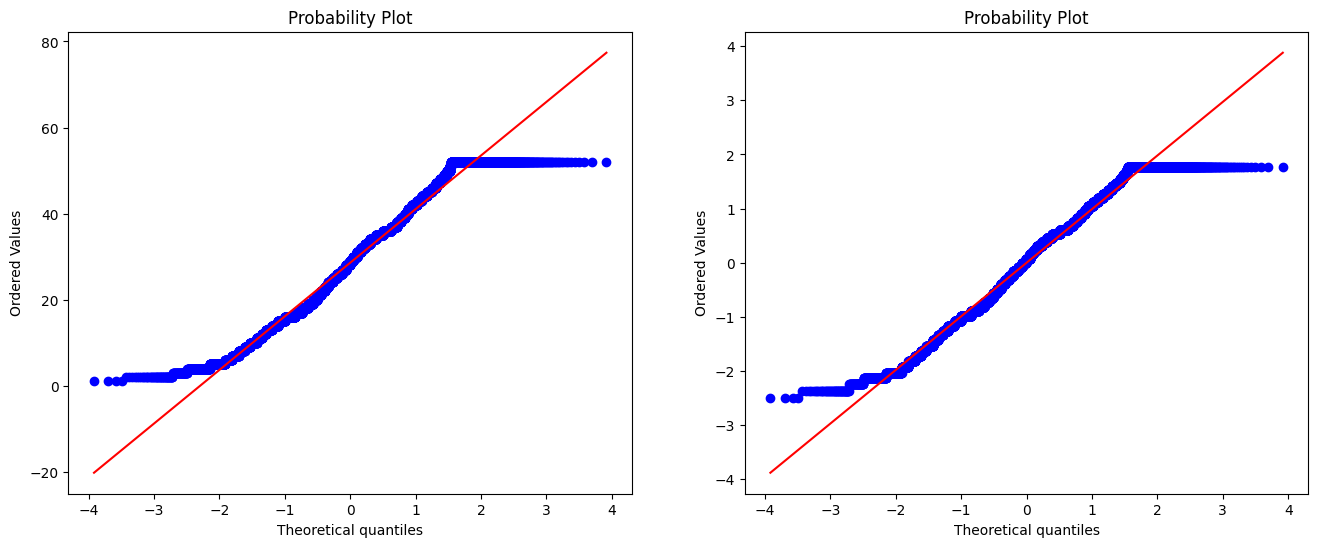

In [89]:
fig, axes = plt.subplots(ncols=2, figsize=(16,6))
probplot(X_train[col_name], plot=axes[0])
probplot(X_train[trans_col_name], plot=axes[1])


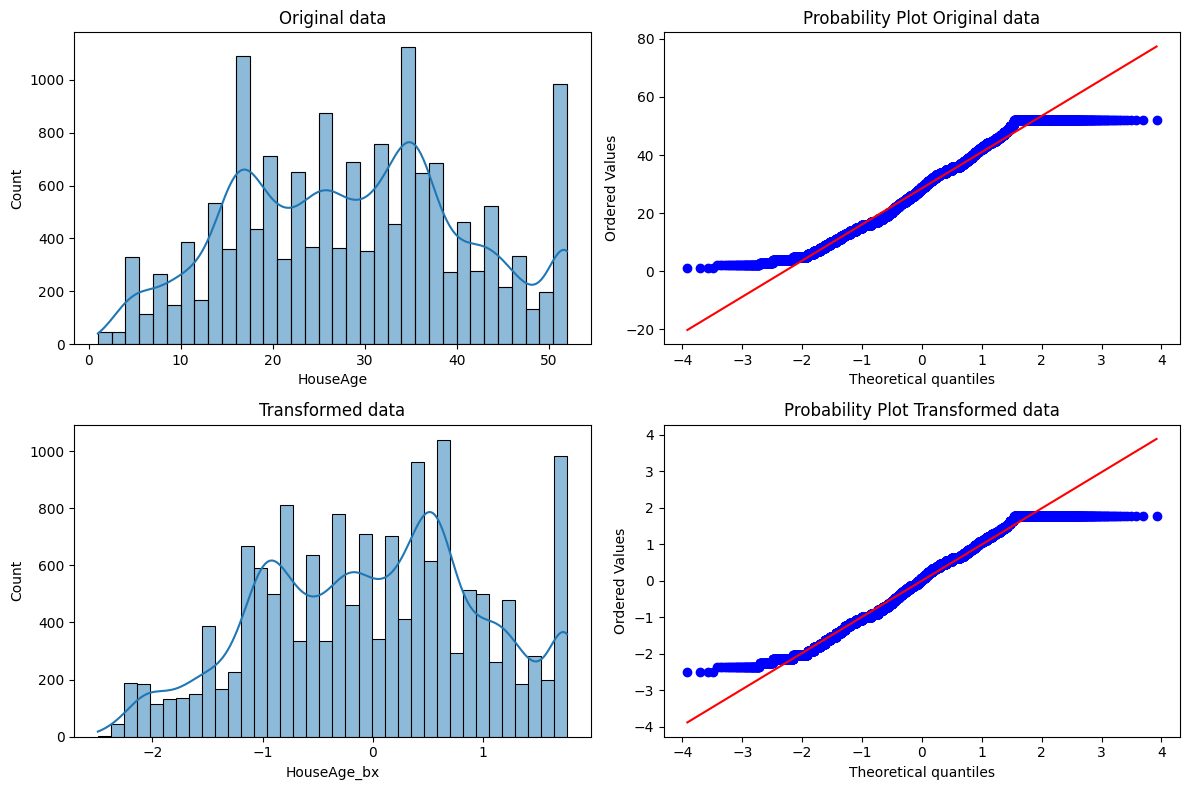

In [90]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
sns.histplot(data=X_train_99, x=col_name, ax=axes[0,0],kde=True)
probplot(X_train[col_name], plot=axes[0,1])
axes[0,0].set_title('Original data')
axes[0,1].set_title(axes[0,1].get_title()+' Original data')
sns.histplot(data=X_train_99, x=trans_col_name, ax=axes[1,0], kde=True)
probplot(X_train[trans_col_name], plot=axes[1,1])
axes[1,0].set_title('Transformed data')
axes[1,1].set_title(axes[1,1].get_title()+' Transformed data')
plt.tight_layout()

## Feature Discretization 변수 이산화
---

### Binarization 이진화

Convert numeric variables to binary responses

[링크 텍스트](https://)https://wikidocs.net/187024

In [92]:
from sklearn.preprocessing import Binarizer

In [93]:
col_name = 'MedInc'
trans_col_name = 'MedInc_bin'

In [95]:
binarizer = Binarizer(threshold=6)

In [96]:
X_train[trans_col_name]= binarizer.fit_transform(X_train[[col_name]])
X_train_99[trans_col_name]= binarizer.fit_transform(X_train_99[[col_name]])

Text(0.5, 1.0, 'Count plot with the binarized data (threshold of 6)')

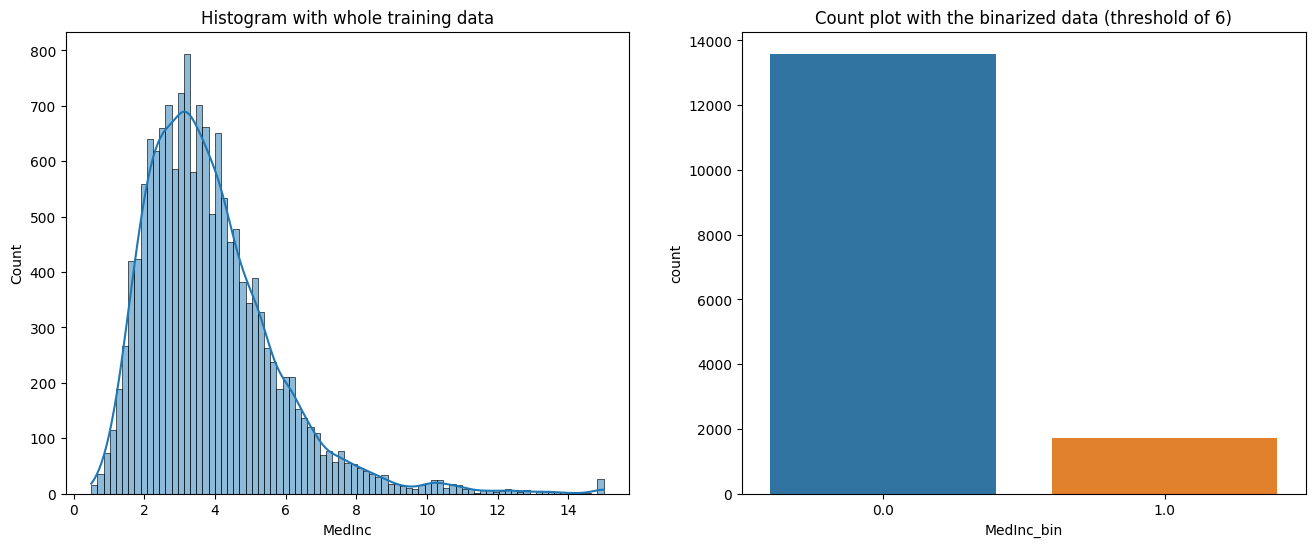

In [97]:
fig, axes = plt.subplots(ncols=2, figsize=(16,6))
sns.histplot(data=X_train_99, x=col_name, ax=axes[0], kde=True)
axes[0].set_title('Histogram with whole training data')
sns.countplot(x=X_train_99[trans_col_name])
axes[1].set_title('Count plot with the binarized data (threshold of 6)')

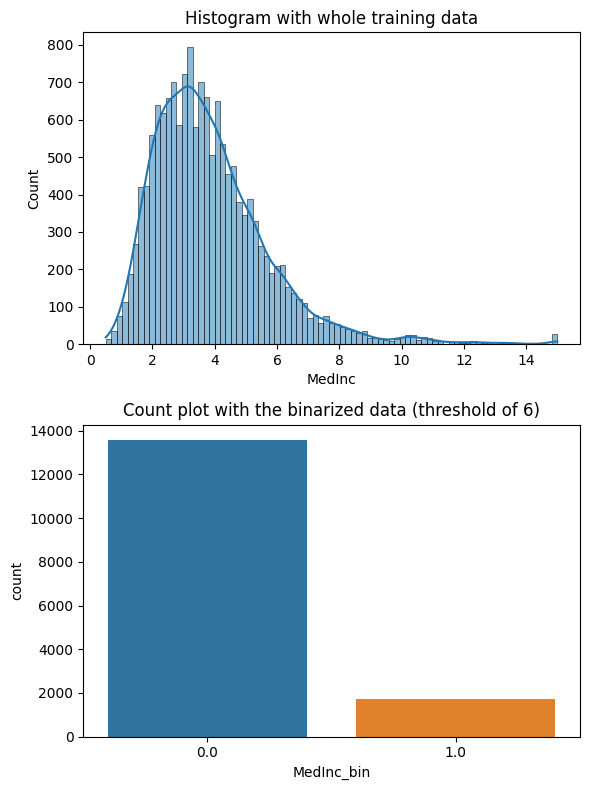

In [98]:
fig, axes = plt.subplots(nrows=2, figsize=(6,8))
sns.histplot(data=X_train_99, x=col_name, ax=axes[0],kde=True)
axes[0].set_title('Histogram with whole training data')
sns.countplot(data=X_train_99, x=trans_col_name, ax=axes[1])
axes[1].set_title('Count plot with the binarized data (threshold of 6)')
plt.tight_layout()

### Uniform binning

Map numeric variables into uniform blocks

In [99]:
from sklearn.preprocessing import KBinsDiscretizer

In [100]:
KBinsDiscretizer?

In [102]:
n_bins = 5

In [103]:
col_name = 'Population'
trans_col_name = 'Population_ubin'

In [106]:
ubin_discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')

In [107]:
X_train[trans_col_name]= ubin_discretizer.fit_transform(X_train[[col_name]])
X_train_99[trans_col_name]= ubin_discretizer.fit_transform(X_train_99[[col_name]])

In [109]:
ubin_discretizer.bin_edges_

array([array([3.00000e+00, 7.13880e+03, 1.42746e+04, 2.14104e+04, 2.85462e+04,
              3.56820e+04])                                                   ],
      dtype=object)

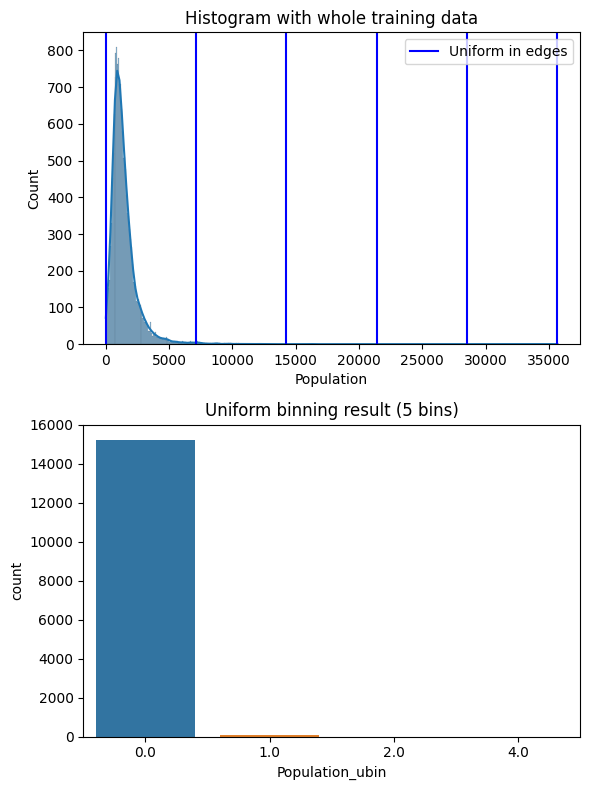

In [110]:
fig, axes = plt.subplots(nrows=2, figsize=(6,8))
sns.histplot(data=X_train_99, x=col_name, ax=axes[0], kde=True)
axes[0].set_title('Histogram with whole training data')
for edge in ubin_discretizer.bin_edges_[0]: # uniform bins
    line = axes[0].axvline(edge, color='b')
axes[0].legend([line], ['Uniform in edges'], fontsize=10)
sns.countplot(x=X_train_99[trans_col_name])
axes[1].set_title(f'Uniform binning result ({n_bins} bins)')
plt.tight_layout()

### *k*-means binning


Map numeric variables into *k* blocks using clustering techniques

In [111]:
col_name = 'Population'
trans_col_name = 'Population_kbin'

In [121]:
kbin_discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='kmeans')

In [122]:
X_train[trans_col_name]= kbin_discretizer.fit_transform(X_train[[col_name]])
X_train_99[trans_col_name]= kbin_discretizer.fit_transform(X_train_99[[col_name]])

In [123]:
kbin_discretizer.bin_edges_

array([array([3.00000000e+00, 1.25154493e+03, 2.49920579e+03, 5.22966908e+03,
              1.96465657e+04, 3.56820000e+04])                               ],
      dtype=object)

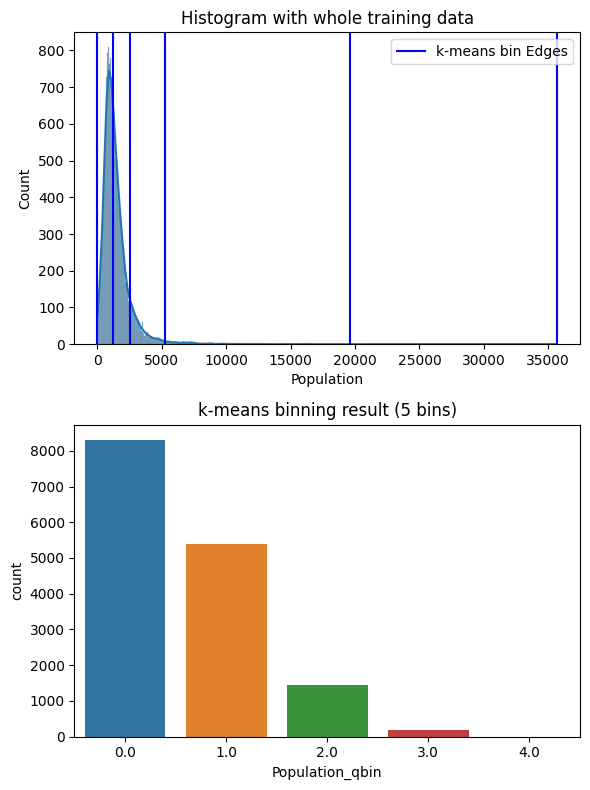

In [124]:
fig, axes = plt.subplots(nrows=2, figsize=(6,8))
sns.histplot(data=X_train_99, x=col_name, ax=axes[0], kde=True)
axes[0].set_title('Histogram with whole training data')
for edge in kbin_discretizer.bin_edges_[0]: # kmeans bins
    line = axes[0].axvline(edge, color='b')
axes[0].legend([line], ['k-means bin Edges'], fontsize=10)
sns.countplot(x=X_train_99[trans_col_name])
axes[1].set_title(f'k-means binning result ({n_bins} bins)')
plt.tight_layout()

### Quantile binning

Map numerical variables in blocks with uniform frequencies


In [116]:
col_name = 'Population'
trans_col_name = 'Population_qbin'

In [125]:
qbin_discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='quantile')

In [126]:
X_train[trans_col_name]= qbin_discretizer.fit_transform(X_train[[col_name]])
X_train_99[trans_col_name]= qbin_discretizer.fit_transform(X_train_99[[col_name]])

In [127]:
qbin_discretizer.bin_edges_

array([array([3.0000e+00, 7.1980e+02, 1.0180e+03, 1.3620e+03, 1.9170e+03,
              3.5682e+04])                                               ],
      dtype=object)

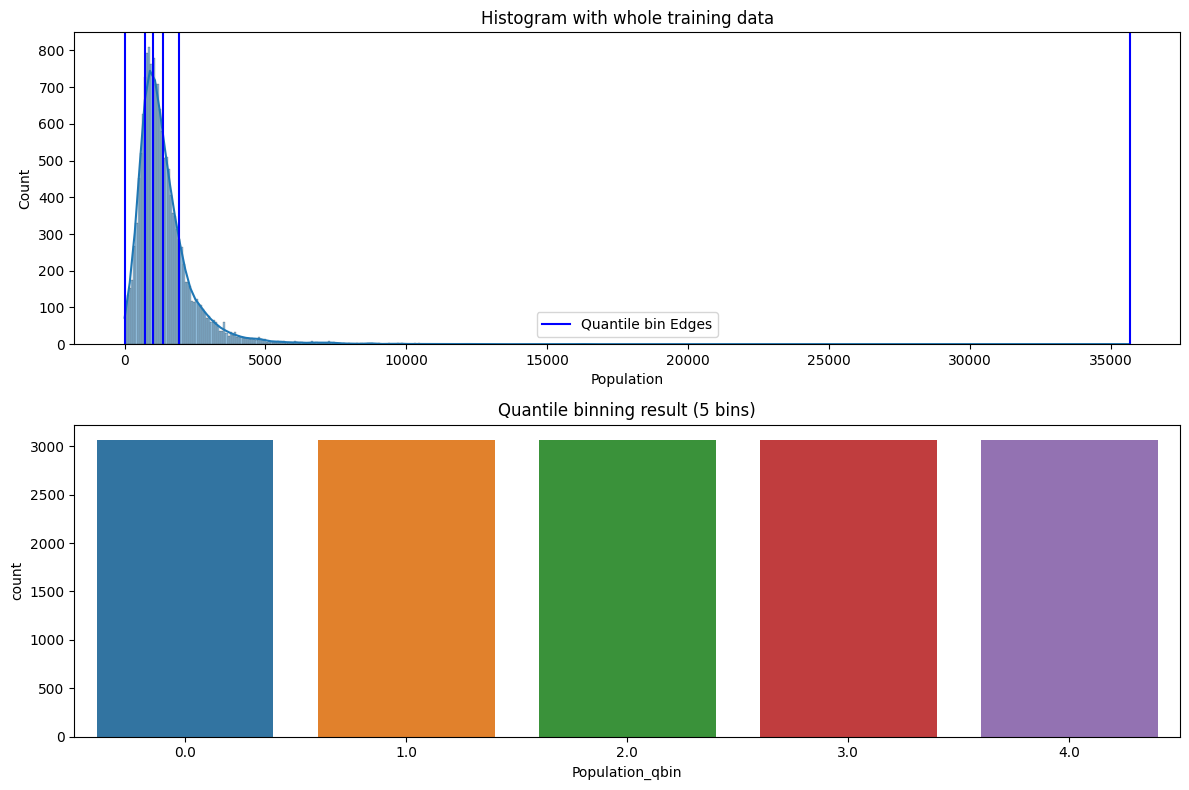

In [128]:
fig, axes = plt.subplots(nrows=2, figsize=(12,8))
sns.histplot(data=X_train_99, x=col_name, ax=axes[0], kde=True)
axes[0].set_title('Histogram with whole training data')
for edge in qbin_discretizer.bin_edges_[0]: # quantile bins
  line = axes[0].axvline(edge, color='b')
axes[0].legend([line], ['Quantile bin Edges'], fontsize=10)
sns.countplot(x=X_train_99[trans_col_name])
axes[1].set_title(f'Quantile binning result ({n_bins} bins)')
plt.tight_layout()

# Encoding categorical predictors

In [129]:
!mkdir data

In [130]:
import gdown

urls = ['https://drive.google.com/uc?export=download&id=16AGQw1nM9NYILv2aSZaSNSn9jBPByWPq', # okc_train  https://drive.google.com/file/d/16AGQw1nM9NYILv2aSZaSNSn9jBPByWPq/view?usp=sharing
        ]
outputs = ['okc_train.csv']
for url,output in zip(urls,outputs):
  gdown.download(url, f'data/{output}', quiet=False)

Downloading...
From: https://drive.google.com/uc?export=download&id=16AGQw1nM9NYILv2aSZaSNSn9jBPByWPq
To: /content/data/okc_train.csv
100%|██████████| 12.3M/12.3M [00:00<00:00, 27.8MB/s]


In [131]:
df = pd.read_csv('data/okc_train.csv',index_col=0)

In [132]:
df.head()

,age,diet,drinks,drugs,education,height,income,last_online,offspring,pets,...,hispanic_latin,indian,middle_eastern,native_american,other,pacific_islander,white,essay_length,Class,profile
1,22,strictly_anything,socially,never,working_on_college_university,75,missing,3,doesnt_have_kids_but_might_want_them,likes_dogs_and_likes_cats,...,0,0,0,0,0,0,1,3.420945,other,1
4,23,vegetarian,socially,drugs_missing,working_on_college_university,71,inc20000,3,doesnt_want_kids,likes_cats,...,0,0,0,0,0,0,1,2.671173,other,3
6,29,mostly_anything,socially,drugs_missing,graduated_from_college_university,67,missing,2,doesnt_have_kids_but_might_want_them,likes_cats,...,0,0,0,0,0,0,1,3.391112,stem,5
8,31,mostly_anything,socially,never,graduated_from_college_university,65,missing,2,doesnt_have_kids_but_wants_them,likes_dogs_and_likes_cats,...,0,0,0,0,0,0,1,3.090611,other,6
10,37,mostly_anything,not_at_all,never,working_on_two_year_college,65,missing,3,kids_missing,likes_dogs_and_likes_cats,...,0,0,0,0,0,0,1,3.382377,other,7


Small test dataset for some explanations and for the figures on the slides


In [ ]:
df_test = pd.DataFrame({
... 'City': ['SF', 'SF', 'SF', 'NYC', 'NYC', 'NYC',
... 'Seattle', 'Seattle', 'Seattle'],
... 'Rent': [3999, 4000, 4001, 3499, 3500, 3501, 2499, 2500, 2501]
... })

In [ ]:
df_test

In [ ]:
df_test.City.unique()

For this worksheet we are going to use the [category_encoders](http://contrib.scikit-learn.org/category_encoders/index.html) library, which is compatible with scikit-learn.

In [ ]:
!pip install category_encoders

# Unsupervised Encoders

### One-Hot Encoder

In [ ]:
col = 'drinks'

In [ ]:
ex_enc = OneHotEncoder(use_cat_names=True)
ex_map = ex_enc.fit_transform(df_test)
ex_enc.mapping[0]['mapping']

### Dummy Coding

In [ ]:
col='drinks'

### Binary Encoder

In [ ]:
ex_enc = BinaryEncoder()
ex_map = ex_enc.fit_transform(df_test)
ex_enc.mapping[0]

In [ ]:
ex_enc.ordinal_encoder.mapping

### Frequency or Count Encoder

Let's try using the group merge functions


### Ordinal Encoder